# Predict House Prices

In [206]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [208]:
def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [209]:
df1=pd.read_csv("/content/drive/Othercomputers/My Laptop/0 Yaz Kampı/Day 3/HW/train.csv")
df2=pd.read_csv("/content/drive/Othercomputers/My Laptop/0 Yaz Kampı/Day 3/HW/test.csv")

## EDA (Only Train Data)

test datasi saleprice barindirmadigindan korelasyon hesabina dahil olmaz
bu yuzden ilk basta sadece train datasi ile calisicaz ardindan 2 veriyi birlestirip calisicaz

In [210]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [211]:
df1.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


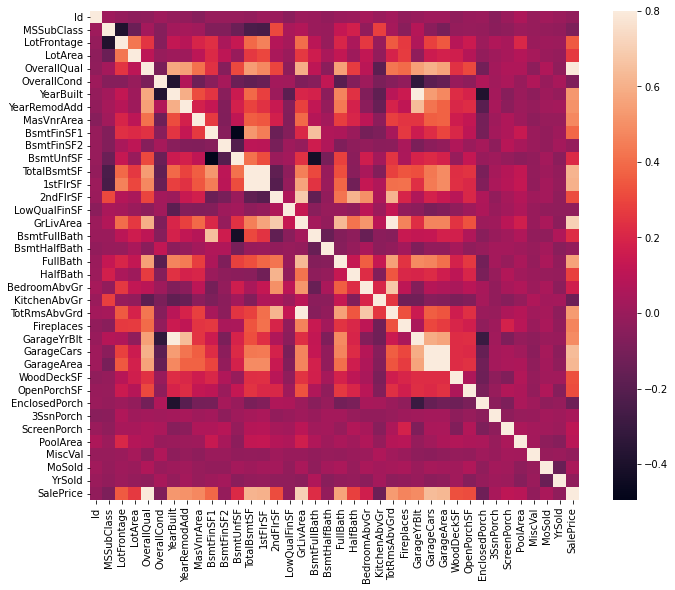

In [212]:
fig = plt.subplots(figsize=(12,9))
sns.heatmap(df1.corr(), vmax=.8, square=True)

- GrivArea, TotalBsmtSF, OverallQuall en iyiler SalePrice icin
- **Birbiri ile asiri korele olanlar:**
- TotalBsmtfSF ile 1stFlrSF 
- Garagex degiskenleri
- GarageYrBlt ile YearBuilt
- TotRmsAbvGrd ile GrlivArea

In [213]:
abs(df1.corr().SalePrice).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

In [214]:
# Ustteki karsilastirmad bulunanlardan Korelasyonu kucuk olanlar silinir
# Ayrica korelasyonu 0.2 den kucuk olanlar silinir.
df1 = df1.drop(['1stFlrSF', 'GarageYrBlt', 'GarageArea', 'TotRmsAbvGrd', 'BsmtHalfBath', 'BsmtFinSF2'], axis=1)
df2 = df2.drop(['1stFlrSF', 'GarageYrBlt', 'GarageArea', 'TotRmsAbvGrd', 'BsmtHalfBath', 'BsmtFinSF2'], axis=1)

## Outliers

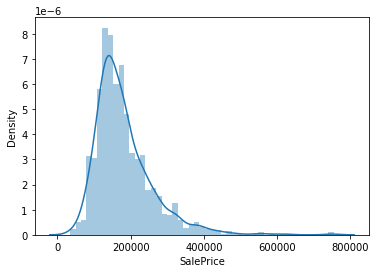

In [215]:
sns.distplot(df1.SalePrice)

In [216]:
df1 = df1[df1.SalePrice<600000]

## Missing Values (Only Train Data)

In [217]:
## Missing Data Information for train data
full = df1.isnull().sum().sort_values(ascending=False)
percent = (full/df1.isnull().count()).sort_values(ascending=False)
NaN_data = pd.concat([full, percent], axis=1, keys=['Total', 'Percent'])
NaN_data.head(20)
# %15 den fazla missing value olan data silinecek

,Total,Percent
PoolQC,1450,0.995879
MiscFeature,1402,0.962912
Alley,1365,0.937500
Fence,1176,0.807692
FireplaceQu,690,0.473901
LotFrontage,259,0.177885
GarageQual,81,0.055632
GarageCond,81,0.055632
GarageType,81,0.055632
GarageFinish,81,0.055632


In [218]:
df1 = df1.drop((NaN_data[NaN_data['Total'] > 1]).index,1) # 1 den fazla missing olanlar silinir
df2 = df2.drop((NaN_data[NaN_data['Total'] > 1]).index,1)

In [219]:
df1 = df1.drop(df1.loc[df1.Electrical.isnull()].index)

In [220]:
full = df1.isnull().sum().sort_values(ascending=False)
percent = (full/df1.isnull().count()).sort_values(ascending=False)
NaN_data = pd.concat([full, percent], axis=1, keys=['Total', 'Percent'])
NaN_data.head(5)

,Total,Percent
Id,0,0.0
Fireplaces,0,0.0
CentralAir,0,0.0
Electrical,0,0.0
2ndFlrSF,0,0.0


In [221]:
abs(df1.corr().SalePrice).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.798097
GrLivArea        0.691027
GarageCars       0.651693
TotalBsmtSF      0.606122
FullBath         0.558338
YearBuilt        0.539619
YearRemodAdd     0.526549
Fireplaces       0.464444
BsmtFinSF1       0.360725
OpenPorchSF      0.329529
WoodDeckSF       0.324539
2ndFlrSF         0.293855
HalfBath         0.279711
LotArea          0.260995
BsmtFullBath     0.231046
BsmtUnfSF        0.229908
BedroomAbvGr     0.162954
KitchenAbvGr     0.140370
EnclosedPorch    0.129893
ScreenPorch      0.123260
MSSubClass       0.087039
OverallCond      0.077899
MoSold           0.062261
3SsnPorch        0.049456
Id               0.034056
PoolArea         0.029807
YrSold           0.025241
LowQualFinSF     0.024969
MiscVal          0.020879
Name: SalePrice, dtype: float64

In [222]:
df = df1.append(df2)
df1.shape, df2.shape

((1455, 58), (1459, 57))

In [223]:
df.isnull().sum()[df.isnull().sum()>0]

MSZoning           4
Utilities          2
Exterior1st        1
Exterior2nd        1
BsmtFinSF1         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
KitchenQual        1
Functional         2
GarageCars         1
SaleType           1
SalePrice       1459
dtype: int64

In [224]:
df = df.drop('MSZoning', axis=1) # 

In [225]:
cols = ['Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'KitchenQual', 'Functional', 'GarageCars', 'SaleType']
for i in cols:
  df[i] = df[i].fillna(df[i].mode()[0]) # [0] aynı sütundaki mode değerini bulmasını istediğimiz için yazdık.

In [226]:
df.isnull().sum()[df.isnull().sum()>0]

SalePrice    1459
dtype: int64

## Feature Engineering

In [227]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['OverallCond'] = df['OverallCond'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df['Age'] = df['YrSold'] - df['YearBuilt']

## Prediction

In [228]:
df = pd.get_dummies(df, drop_first=True)

In [229]:
df1 = df[:1455]
df2 = df[1455:]
df1.shape, df2.shape

((1455, 217), (1459, 217))

In [230]:
print(df1.SalePrice)

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1455, dtype: float64


In [231]:
algo_test(df1.drop('SalePrice', axis=1), df1.SalePrice)

[06:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,R_Squared,RMSE,MAE
XGBRegressor,0.925291,20391.351862,14304.661297
Gradient Boosting,0.923007,20700.609707,14562.862264
Ridge,0.889846,24760.496298,18122.465594
ElasticNet,0.859246,27989.076451,19304.228364
Decision Tree,0.721671,39358.392965,25433.621993
Extra Tree,0.718993,39547.287255,26480.793814
KNeighborsRegressor,0.714398,39869.302554,27878.975258
Lasso,0.670645,42814.468415,18719.790487
Linear,0.654673,43840.284808,18853.866299


In [232]:
df1_train, df1_test, y_train, y_test = train_test_split(df1.drop('SalePrice', axis=1), df1.SalePrice,test_size=.2,random_state=7)
XGB=XGBRegressor()
predictions = XGB.fit(df1_train, y_train).predict(df2.drop('SalePrice', axis=1))

[06:18:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [233]:
submission = pd.DataFrame()
submission['Id']=df2['Id'] # [] siz gosterim var olmamista sutun icin kullanilmamali
submission['SalePrice']=predictions
submission.to_csv('submission.csv', index=False)

In [234]:
print(submission)

        Id      SalePrice
0     1461  128401.523438
1     1462  158892.078125
2     1463  182751.484375
3     1464  185771.656250
4     1465  199156.734375
...    ...            ...
1454  2915   84562.195312
1455  2916   90173.179688
1456  2917  168177.421875
1457  2918  123746.898438
1458  2919  235147.734375

[1459 rows x 2 columns]
